In [11]:
import numpy as np
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [12]:
image = mx.image.imread('pak.jpg')
print('data type:', image.dtype)
print('minimum value: ',image.min().asscalar())
print('maximum value: ',image.max().asscalar())

data type: <class 'numpy.uint8'>
minimum value:  0
maximum value:  255


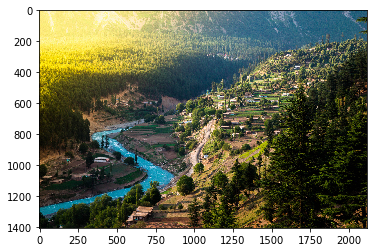

In [13]:
plt.imshow(image.asnumpy())

In [14]:
image = gcv.data.transforms.presets.imagenet.transform_eval(image)
print('shape: ', image.shape)
print('data type: ',image.dtype)
print('minimum value: ', image.min().asscalar())
print('maximum value: ', image.max().asscalar())

shape:  (1, 3, 224, 224)
data type:  <class 'numpy.float32'>
minimum value:  -2.117904
maximum value:  2.64


# Load model

In [17]:
network = gcv.model_zoo.get_model('resnet50_v1d', pretrained=True)
# or
# network = gcv.model_zoo.resnet50_v1d(pretrained=True)


In [19]:
prediction = network(image)


In [20]:
print(prediction.shape)
prediction = prediction[0]
print(prediction.shape)

(1, 1000)
(1000,)


In [21]:
print('Skipping 950 values...')
print(prediction[950:])

Skipping 950 values...

[ 4.0238875e-01  6.5413547e-01  7.2800106e-01  7.2608846e-01
  5.5869555e-01 -1.2324011e-01  1.7001255e-01  1.1039209e+00
  1.0664318e+00  4.3283963e-01  1.7550665e-01  1.3800360e-01
  2.2405627e-01  2.0484507e-02  3.4449971e-01  4.0871146e-01
  8.7545073e-01  8.3556163e-01  8.1442738e-01  7.4303615e-01
  5.0143781e+00  6.9071221e-01  5.3246841e+00  1.9429129e+00
 -6.2247038e-02  5.3489952e+00  6.0321126e+00  1.5792685e+00
  4.8970098e+00  7.6997776e+00  1.4656672e+00 -4.4736683e-02
  9.4098079e-01  6.5508091e-01  3.4867482e+00  1.3070129e+00
  5.6954050e-01  5.2713495e-01  5.4282099e-01  1.2807696e-01
  6.7789721e-01 -2.2528572e-01  2.4572688e-01  3.6072561e-01
  4.2119157e-01  6.6177970e-01  3.9363989e-01 -2.1723017e-01
  1.7984509e-03  9.8163348e-01]
<NDArray 50 @cpu(0)>


# Calculate probability

In [20]:
probability = mx.nd.softmax(prediction)

In [21]:
rounded_probability = mx.nd.round(probability*100)/100
print('Skipping 950 values...')
print(rounded_probability[950:])

Skipping 950 values...

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.03 0.   0.04 0.   0.   0.04 0.09 0.
 0.03 0.46 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 50 @cpu(0)>


working of softmax function

In [24]:
mx.nd.softmax(mx.nd.array((-0.5,0.5)))


[0.26894143 0.7310586 ]
<NDArray 2 @cpu(0)>

In [25]:
mx.nd.softmax(mx.nd.array((-0.5,1)))


[0.18242551 0.81757444]
<NDArray 2 @cpu(0)>

In [26]:
mx.nd.softmax(mx.nd.array((-1.0,1.0)))


[0.11920291 0.880797  ]
<NDArray 2 @cpu(0)>

# Get top-k

In [27]:
k=5
topk_indicies = mx.nd.topk(probability, k=k)
topk_indicies


[979. 976. 975. 972. 970.]
<NDArray 5 @cpu(0)>

# Get class labels

In [28]:
network.classes[567]

'frying pan'

# Final answers

In [29]:
for i in range(k):
    class_index = topk_indicies[i].astype('int').asscalar()
    class_label = network.classes[class_index]
    class_probability = probability[class_index]
    print('#{} {} ({:0.3}%)'.format(i+1,class_label, class_probability.asscalar()*100))

#1 valley (45.8%)
#2 promontory (8.64%)
#3 lakeside (4.36%)
#4 cliff (4.26%)
#5 alp (3.12%)
